# Context

<b>Background and Context</b>

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

 

# Objective


<b>Objective</b>
<li>
To predict whether a liability customer will buy a personal loan or not.</li>
<li>Which variables are most significant.</li>
<li>Which segment of customers should be targeted more.</li>

# Dataset

Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import average_precision_score,roc_auc_score,auc,roc_curve,precision_recall_curve
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Reading the Dataset

In [2]:
data=pd.read_csv("Loan_Modelling.csv")

In [3]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


##  Info on data set 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All Columns are data type integer and only one is float 

## Shape of the Dataset

In [6]:
data.shape

(5000, 14)

There  are 5000 rows and 14 columns

## Finding Duplicate Values

In [7]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

No Duplicate Values in the above Data set

## Checking on Missing Value

In [8]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

## Statistical Summary on the Dataset

No Missing value in the Dataset

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Finding Unique Values

In [10]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
data['Income'].value_counts()

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

In [12]:
data['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [13]:
data['CD_Account'].value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

In [14]:
data['Securities_Account'].value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

In [15]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [17]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [18]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [19]:
data['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [20]:
data.drop(["ID"],axis=1,inplace=True)

In [21]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

# Univariate  Analysis

In [22]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# write a function so it help us see boxplot and histogram for any input numerical value
# This function takes the numerical column as the input and returns the boxplots & histograms for the variable.

def histogram_boxplot(feature, figsize=(10,8), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Analysing Age in depth and Graph on AGE

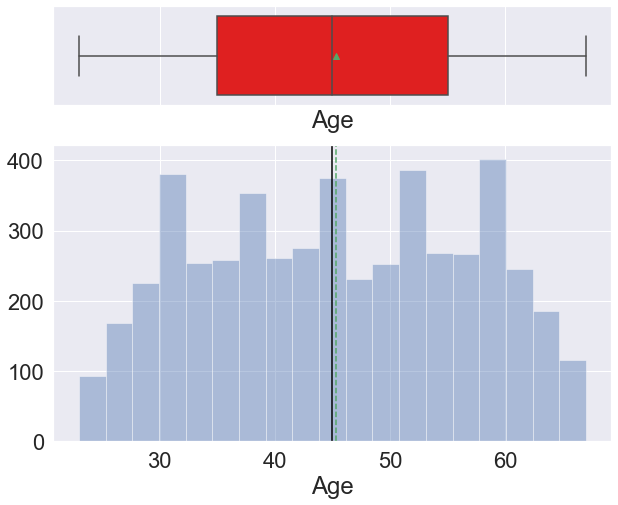

In [23]:
histogram_boxplot(data.Age)

In [24]:
data['Age'].value_counts(dropna=False)

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [25]:
data['Age'].min()

23

In [26]:
data['Age'].max()

67

In [27]:
# can add custom labels
data['Age_Range'] = pd.cut(
    data['Age'], [20,29,49,59,69], 
    labels = ["InTwenty", "ThirtyandFourty","Fifty","Sixty"]
)

data['Age_Range'].value_counts(dropna=False)


ThirtyandFourty    2504
Fifty              1334
Sixty               674
InTwenty            488
Name: Age_Range, dtype: int64

In [28]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Age_Range'],
      dtype='object')

## Histogram and boxplot on experience

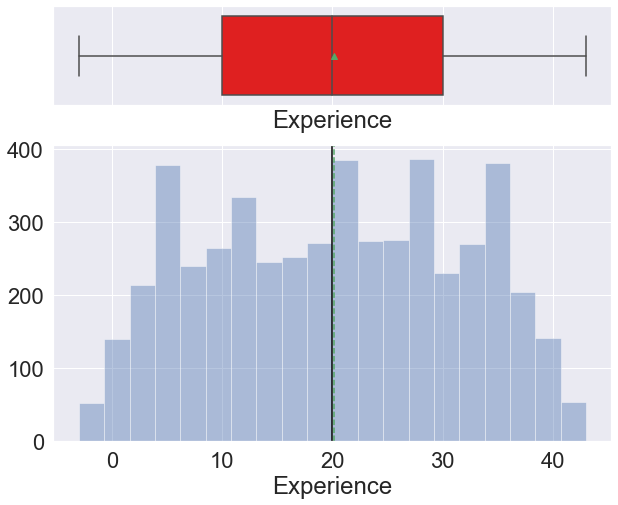

In [29]:
histogram_boxplot(data.Experience)

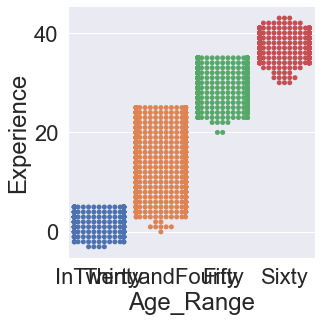

In [30]:
sns.catplot(x='Age_Range',y='Experience',data=
                data,kind='swarm')

In [31]:
NoExperience = data.query("Experience<0")
NoExperience

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_Range
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1,InTwenty
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0,InTwenty
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0,InTwenty
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0,InTwenty
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0,InTwenty
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0,InTwenty
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0,InTwenty
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1,InTwenty
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0,InTwenty
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1,InTwenty


In [32]:
NoExperience.Income.describe()

count     52.000000
mean      69.942308
std       37.955295
min       12.000000
25%       40.750000
50%       65.500000
75%       86.750000
max      150.000000
Name: Income, dtype: float64

In [33]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Age_Range'],
      dtype='object')

There are some Negative Values here to work on this column

## Converting Negetive to positive values

In [34]:
data['Experience'] = data['Experience'].abs() 

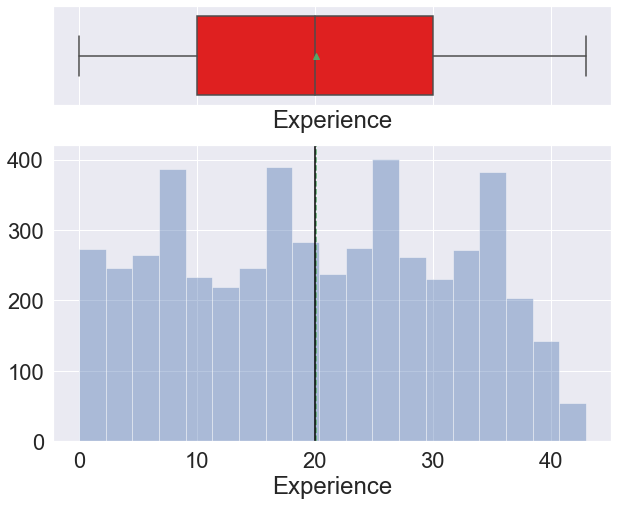

In [35]:
histogram_boxplot(data.Experience)

## Histogram and Boxplot on Income

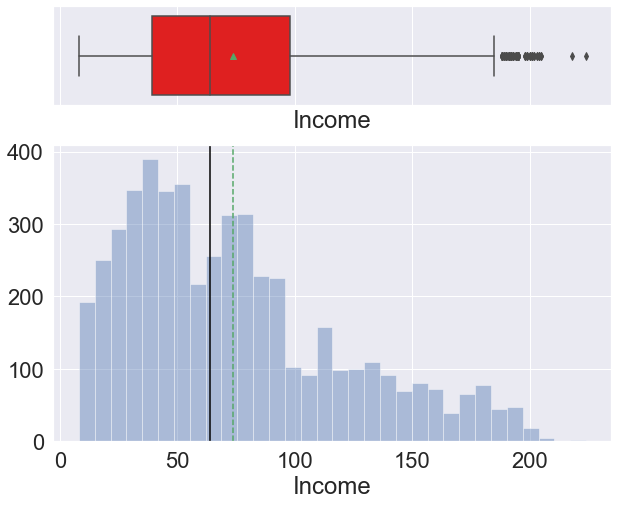

In [36]:
histogram_boxplot(data.Income)

Annual Income of the sample set in thousand dollars.This has few outliers and it is right skewed 

## Graph on Family size of the customer

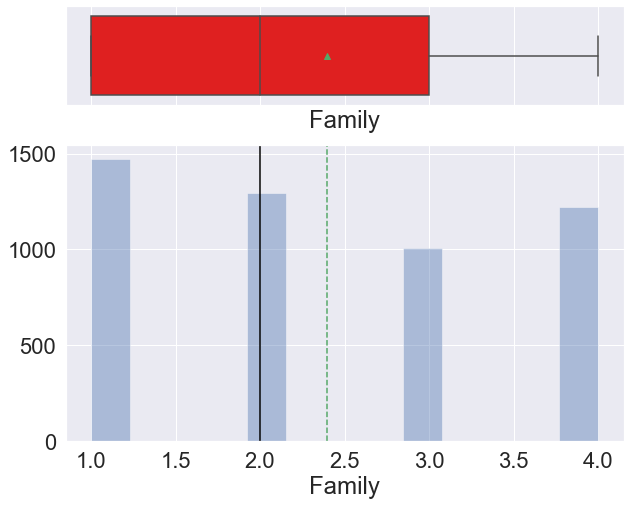

In [37]:
histogram_boxplot(data.Family)

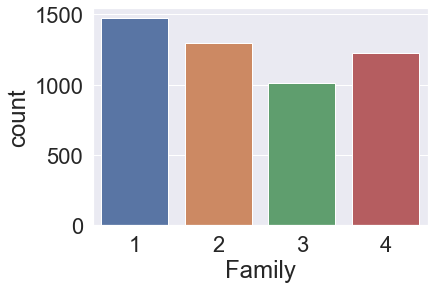

In [38]:
sns.countplot(x='Family',data=data)

## Graph on zip Code

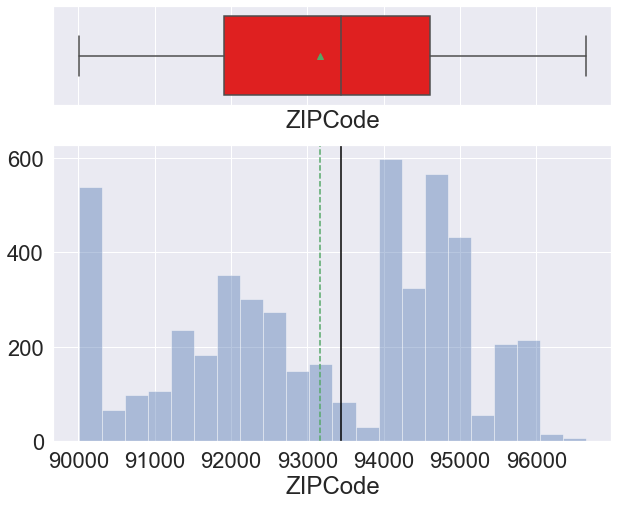

In [39]:
histogram_boxplot(data.ZIPCode)

In [40]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Age_Range'],
      dtype='object')

## Average spending on credit cards per month (in thousand dollars)

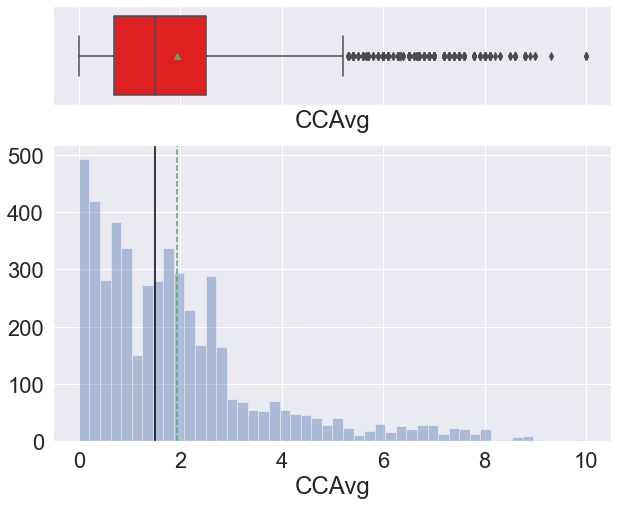

In [41]:
histogram_boxplot(data.CCAvg)

## Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

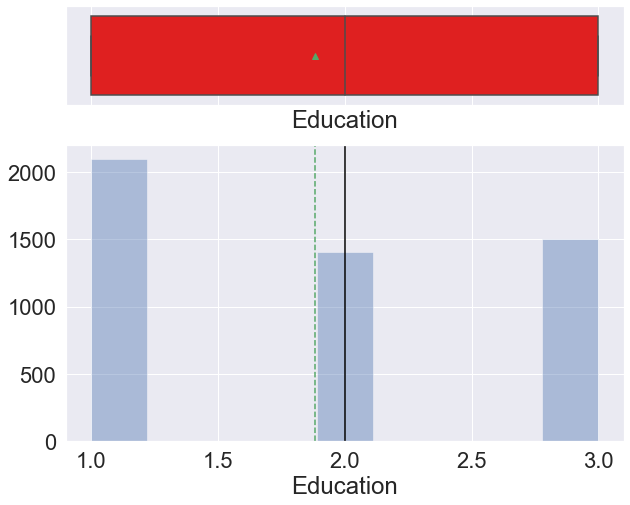

In [42]:
histogram_boxplot(data.Education)

## Mortgage: Value of house mortgage (in thousand dollars)

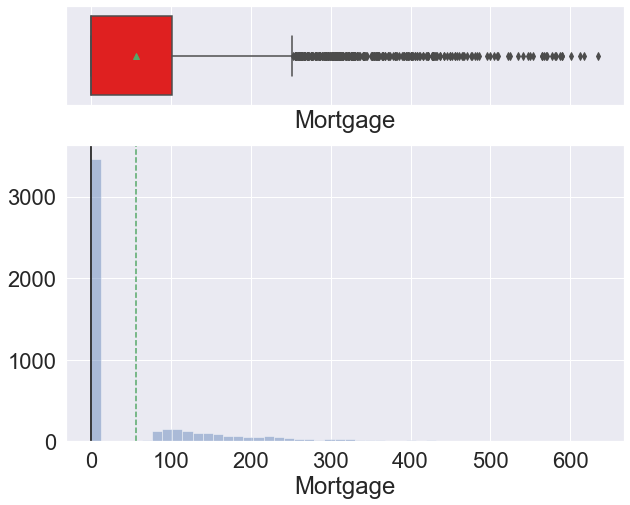

In [43]:
histogram_boxplot(data.Mortgage)

## Personal_Loan: Did this customer accept the personal loan offered in the last campaign?Analysis on that

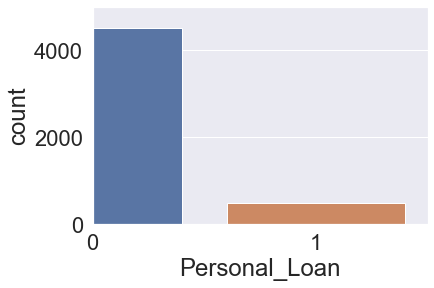

In [44]:
sns.countplot(x='Personal_Loan',data=data)
plt.ylim(0, 5000)
plt.xlim(0, None)
 
plt.show()


From the graph not many seems to have accepted the offer of personal loan

## Securities_Account: Analysis

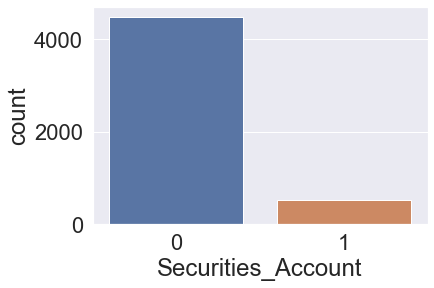

In [45]:
sns.countplot(x='Securities_Account',data=data)

    Not many seem to have securities account either

## CD_Account:Analysis

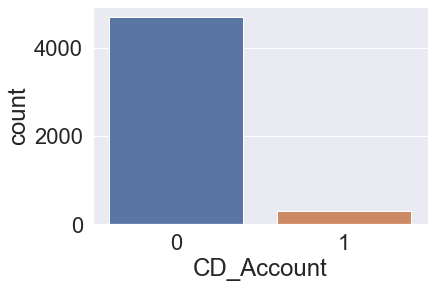

In [46]:
sns.countplot(x='CD_Account',data=data)

## No of people having Online Account

Text(0.5, 1.0, 'Count plot on online account')

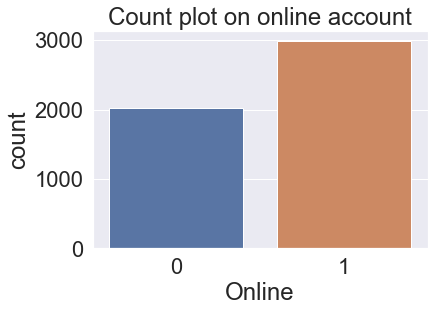

In [47]:
sns.countplot(x='Online',data=data)
plt.title('Count plot on online account')


Many seem to have Online account

## No of people  having Creditcard

Text(0.5, 1.0, 'Count plot on Credit card')

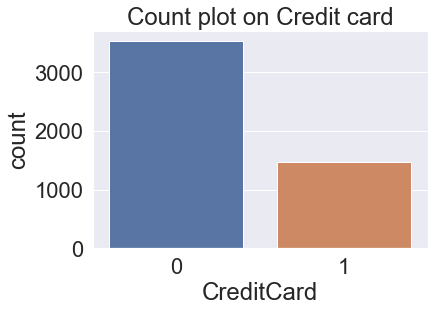

In [48]:
sns.countplot(x='CreditCard',data=data)
plt.title('Count plot on Credit card')

Not many seem to have Credot card 

# Bivariate  Analysis

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [50]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Age_Range'],
      dtype='object')

## Comparing income and Education

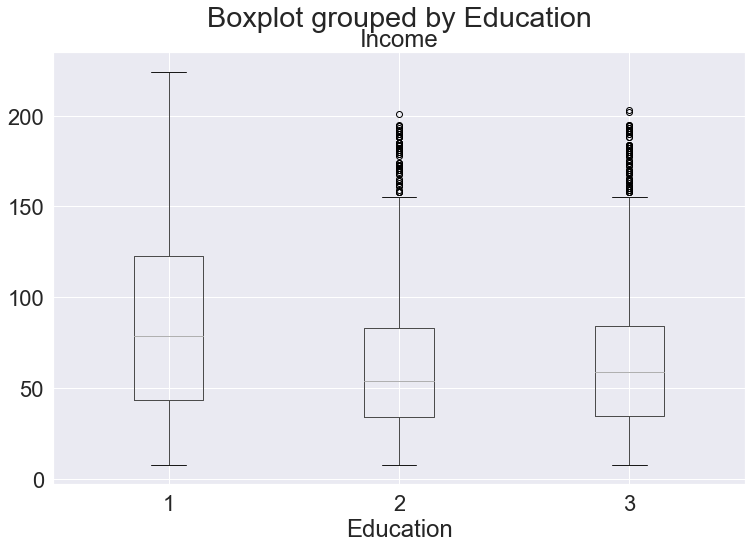

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
data.boxplot('Income', by='Education',ax=ax)


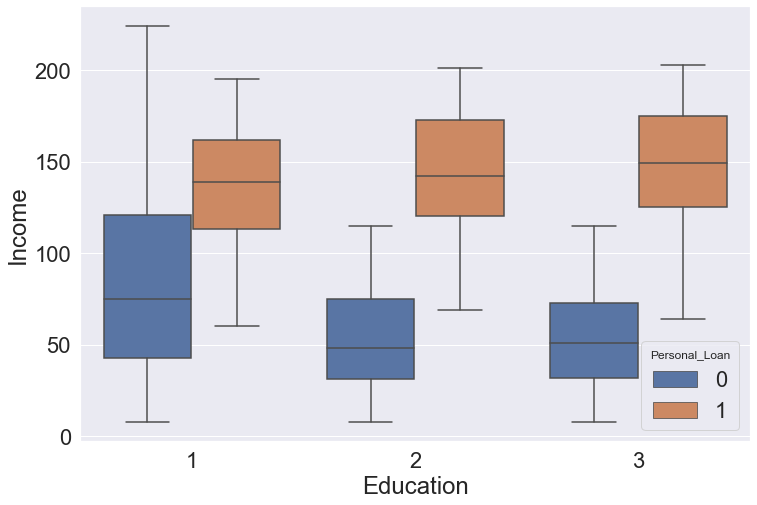

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='Education', y='Income', hue='Personal_Loan', data = data,ax=ax)

Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

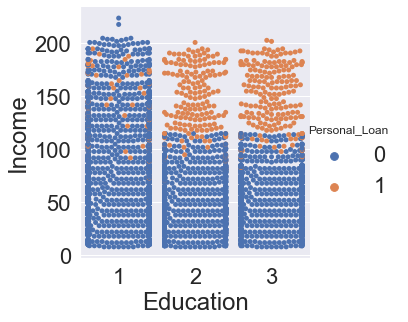

In [53]:
sns.catplot(x='Education',y='Income',data=data,hue='Personal_Loan',kind='swarm')

the most people who has a personal Loan are from people who has the Advance/Pofessionals and people who has Income more that 100,000 dollars

## Anova test in income and education to see if there is an influece of education in income

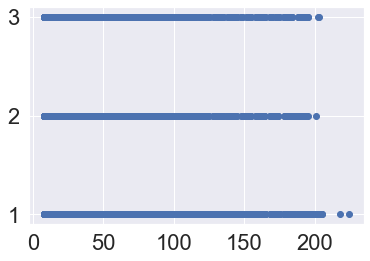

In [54]:
x=data['Income']
y=data['Education']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.show()


In [55]:
mod=ols('Income ~ Education',data=data).fit()
anova_table=sm.stats.anova_lm(mod,typ=2)
print(anova_table)

                 sum_sq      df           F        PR(>F)
Education  3.725207e+05     1.0  182.162202  8.411848e-41
Residual   1.022088e+07  4998.0         NaN           NaN


so the Significance is very small that education does have  influence on Income 

## Anova test on the Personal loan  and income

In [56]:
mod=ols('Income ~ Personal_Loan',data=data).fit()
anova_table=sm.stats.anova_lm(mod,typ=2)
print(anova_table)

                     sum_sq      df           F         PR(>F)
Personal_Loan  2.674499e+06     1.0  1688.00458  3.560291e-318
Residual       7.918903e+06  4998.0         NaN            NaN


so the Significance is very small that Income  does have  influence on Personal loan

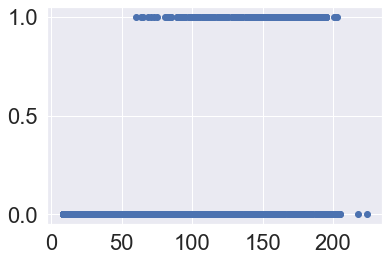

In [57]:

x=data['Income']
y=data['Personal_Loan']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.show()


It seems the people who have Income more than 50000 per year seems to have taken Personal loan

## Analysing on Education and Personal Loan

In [58]:
mod=ols('Education ~ Personal_Loan',data=data).fit()
anova_table=sm.stats.anova_lm(mod,typ=2)
print(anova_table)

                    sum_sq      df          F        PR(>F)
Personal_Loan    65.914395     1.0  95.206194  2.709663e-22
Residual       3460.280605  4998.0        NaN           NaN


Education as well seems to have some significance in the personal loan

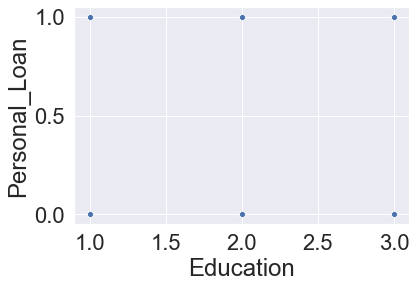

In [59]:
sns.scatterplot(x='Education',y='Personal_Loan',data=data)

In [60]:
undergraduate=data.query("Education==1")
Loanholder_UG=undergraduate.query("Personal_Loan==1")
Loanholder_UG.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0,93.000000,93.0,93.000000,93.000000,93.000000,93.000000
mean,45.698925,20.677419,136.881720,92963.354839,3.193548,3.531505,1.0,118.193548,1.0,0.150538,0.344086,0.548387,0.344086
std,11.206350,11.303290,32.965018,1759.341383,0.911974,2.008681,0.0,163.569109,0.0,0.359536,0.477644,0.500351,0.477644
min,26.000000,1.000000,60.000000,90032.000000,1.000000,0.200000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,36.000000,12.000000,113.000000,91711.000000,3.000000,2.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,44.000000,20.000000,139.000000,92677.000000,3.000000,3.500000,1.0,0.000000,1.0,0.000000,0.000000,1.000000,0.000000
75%,56.000000,30.000000,162.000000,94542.000000,4.000000,4.900000,1.0,227.000000,1.0,0.000000,1.000000,1.000000,1.000000
max,65.000000,41.000000,195.000000,95929.000000,4.000000,8.500000,1.0,617.000000,1.0,1.000000,1.000000,1.000000,1.000000


## Analysing on Income and Age

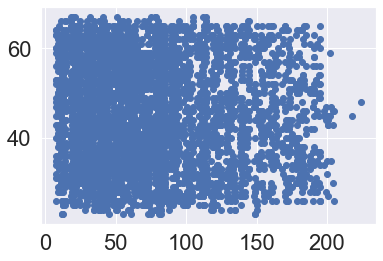

In [61]:
x=data['Income']
y=data['Age']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.show()


## Analysing on Personal_Loan and Education

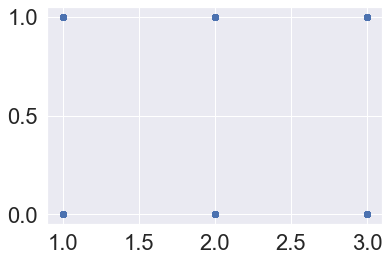

In [62]:
x=data['Education']
y=data['Personal_Loan']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.show()


In [63]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Age_Range'],
      dtype='object')

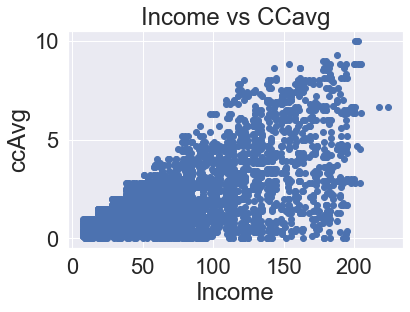

In [64]:
x=data['Income']
y=data['CCAvg']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.title ('Income vs CCavg')
plt.xlabel('Income')
plt.ylabel('ccAvg')
plt.show()

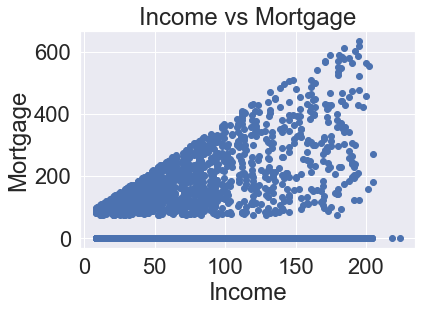

In [65]:
x=data['Income']
y=data['Mortgage']
plt.title ('Income vs Mortgage')
plt.xlabel('Income')
plt.ylabel('Mortgage')
np.corrcoef(x,y)
plt.scatter(x,y)
plt.show()

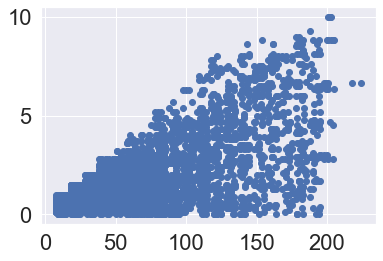

In [66]:
x=data['Income']
y=data['CCAvg']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.show()

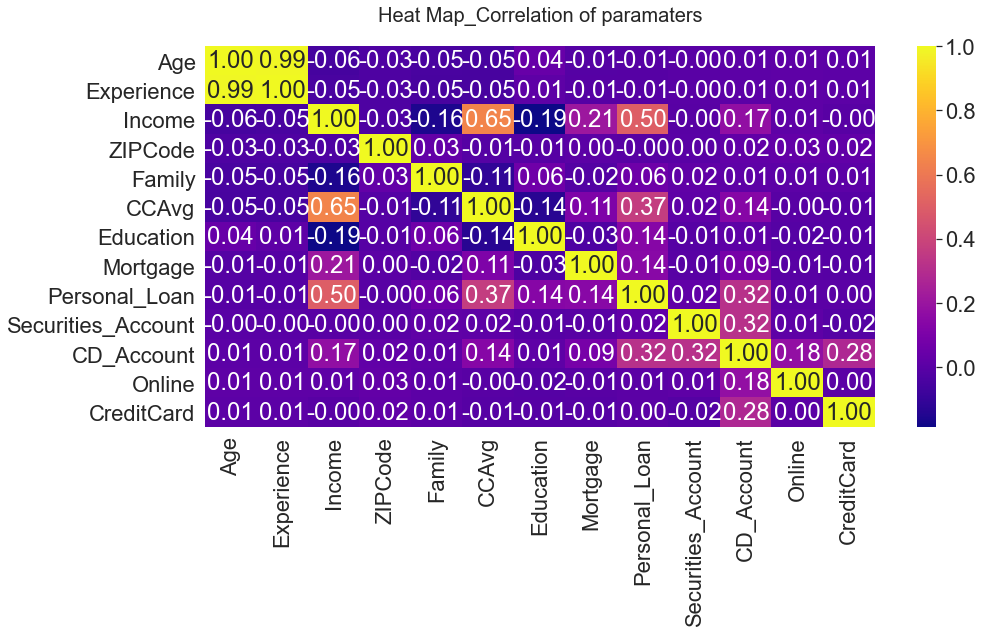

In [67]:
plt.figure(figsize = (15,7))
plt.title('Heat Map_Correlation of paramaters', y=1.05, size=20)
sns.heatmap(data.corr(), cmap='plasma',annot=True, fmt='.2f')

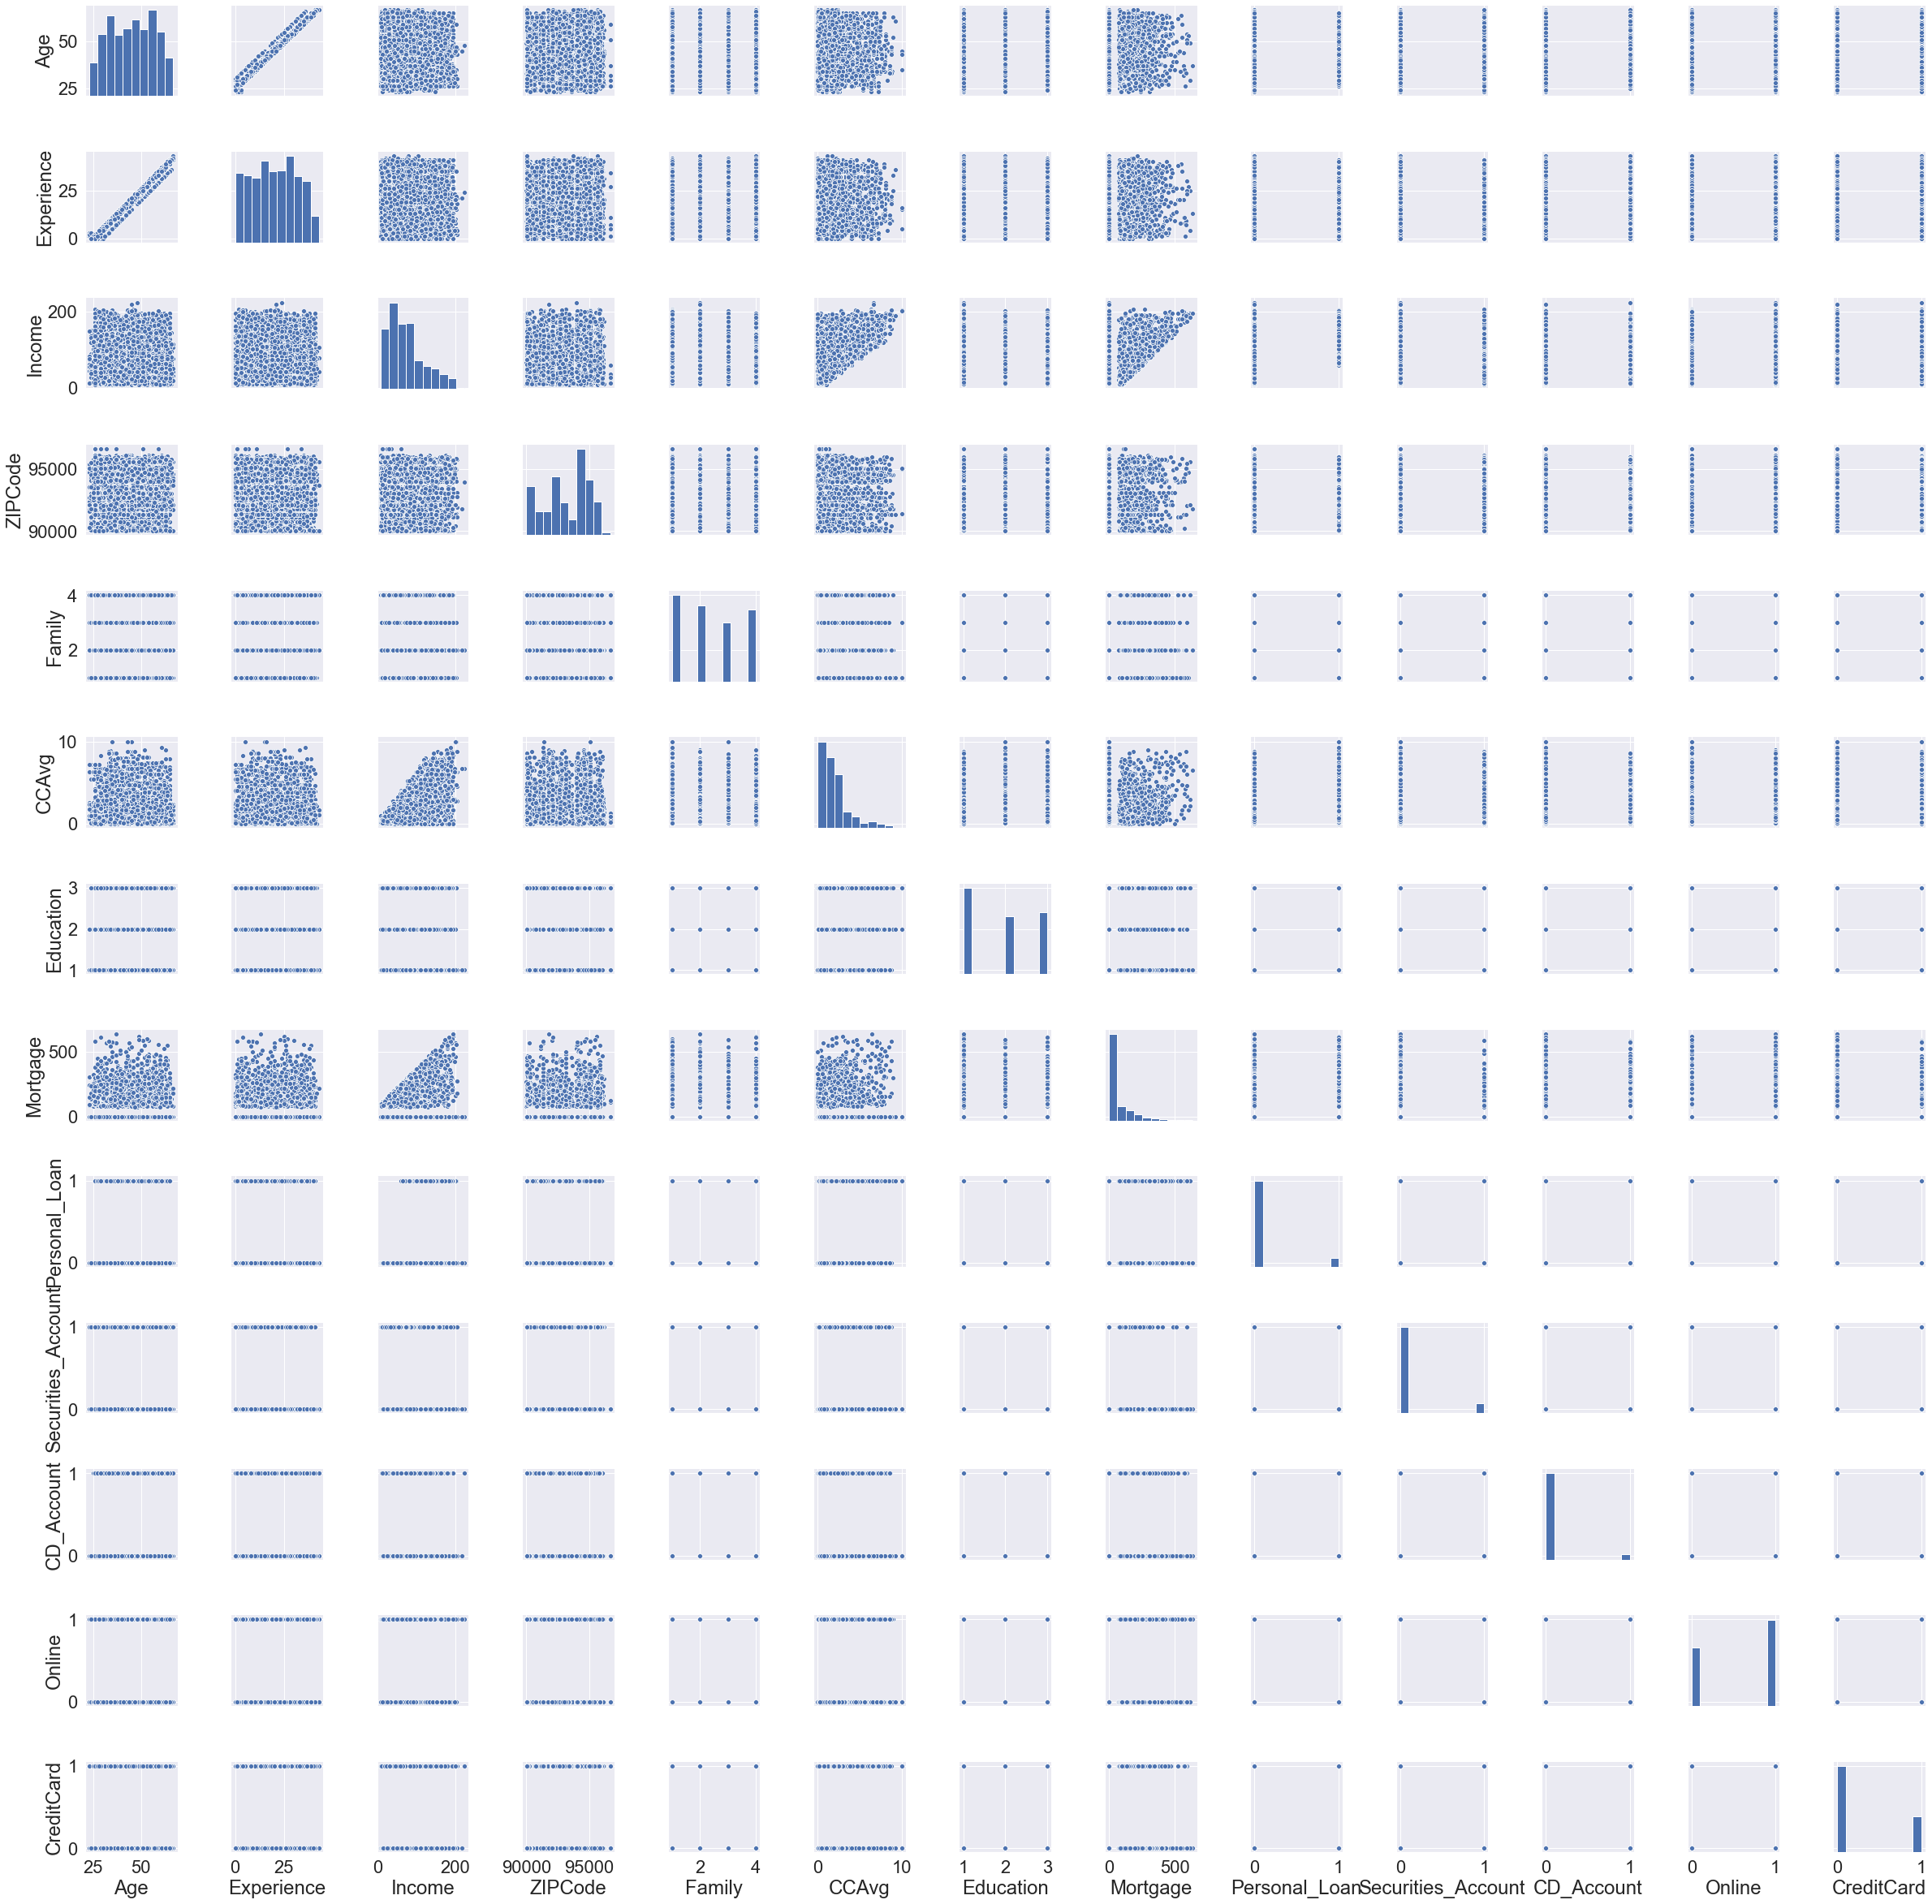

In [68]:
sns.pairplot(data)

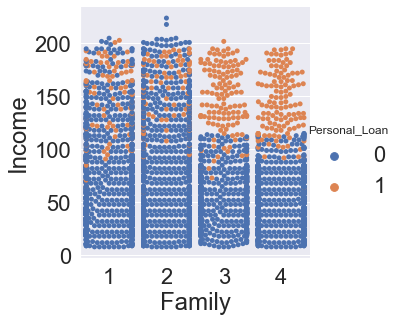

In [69]:
sns.catplot(x='Family', y='Income', hue='Personal_Loan', data = data, kind='swarm')

From sample data family size who has 3 or greater with higher income between 100k to 200k are more likely to take loan.

In [70]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
#df = treat_outliers_all(df,numerical_col)

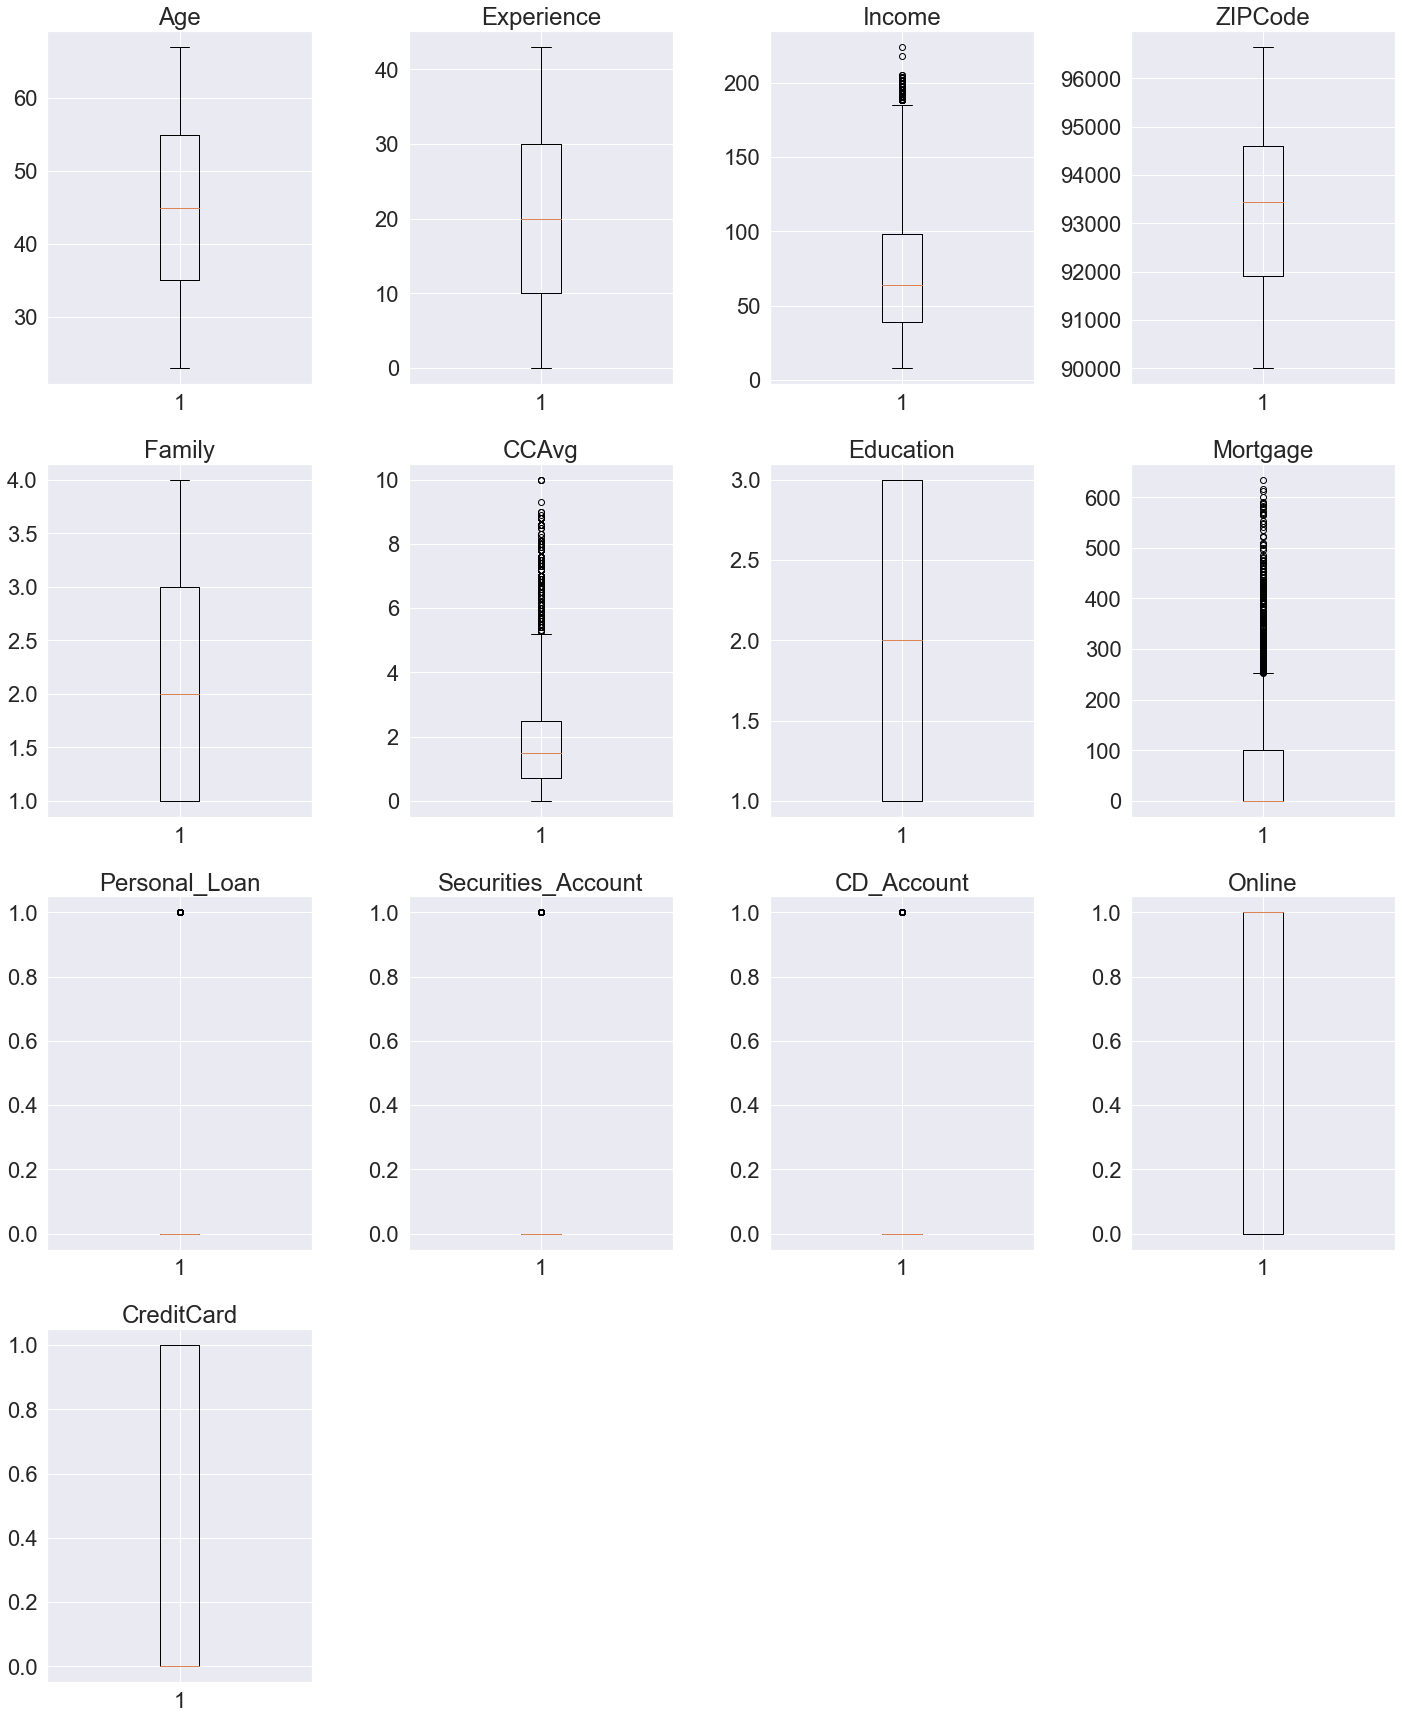

In [71]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
 13  Age_Range           5000 non-null   category
dtypes: category(1), float64(1), int64(12)
memory usage: 513.0 KB


# Model Building

Machine Learning Steps
We always do 4 things when modeling:

Instantiate the model (start it up)
Fit the model using the .fit() function
Make predictions using the .predict() function
Evaluate the model using our chosen evaluation metrics
We will do all of these steps for each model we've chosen to use today, linear regression.

## Spliting Data

In [73]:
X = data.drop(['Personal_Loan'], axis=1)
y = data['Personal_Loan']

## Creating another data set without age and comparing them with the other one

In [74]:
X1 = data.drop(['Age','Age_Range',], axis=1)
y1 = data['Personal_Loan']

In [75]:
X = pd.get_dummies(X, columns=['Age_Range'], drop_first=True)

## Test and Training Model 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [77]:
print('X train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('X test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

X train data (4000, 15)
y train data (4000,)
X test data  (1000, 15)
y test data  (1000,)


In [78]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [79]:
print('X1 train data {}'.format(X1_train.shape))
print('y1 train data {}'.format(y1_train.shape))
print('X1 test data  {}'.format(X1_test.shape))
print('y1 test data  {}'.format(y1_test.shape))

X1 train data (4000, 12)
y1 train data (4000,)
X1 test data  (1000, 12)
y1 test data  (1000,)


In [80]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))

80.00% data is in training set
20.00% data is in test set


In [81]:
print("{0:0.2f}% data is in training set".format((len(X1_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X1_test)/len(data.index)) * 100))

80.00% data is in training set
20.00% data is in test set


## Logistic Regression with sklearn library

### Without dropping Age and Age range

In [82]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model_fit=model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2        3         4         5         6  \
0  0.005048  0.001606  0.036542 -0.00007  0.014746  0.007162  0.017101   

          7         8         9       10        11        12        13  \
0  0.000955  0.000592  0.004315 -0.00019 -0.000161 -0.000026 -0.000332   

         14  intercept  
0  0.000474  -0.000062  


In [83]:
model_score = model.score(X_test, y_test)
print(model_score)

0.909


### Model after dropping Age and Age range

In [84]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model1 = LogisticRegression(solver="liblinear")
model1_fit=model1.fit(X1_train, y1_train)
#predict on test
y1_predict = model1.predict(X1_test)


coef_df1 = pd.DataFrame(model1.coef_)
coef_df1['intercept'] = model1.intercept_
print(coef_df1)

          0         1         2         3         4         5         6  \
0  0.001243  0.036551 -0.000067  0.012056  0.006043  0.013996  0.000944   

         7         8         9        10        11  intercept  
0  0.01526  0.000485  0.003545 -0.000153 -0.000131  -0.000051  


In [85]:
model1_score = model1.score(X1_test, y1_test)
print(model1_score)

0.908


Inference: Not much of difference in the model score it reduces by 0.001 

In [86]:
def get_metrics_score1(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict(train)>threshold)
    pred_test = (model.predict(test)>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

## Confusion Metrics

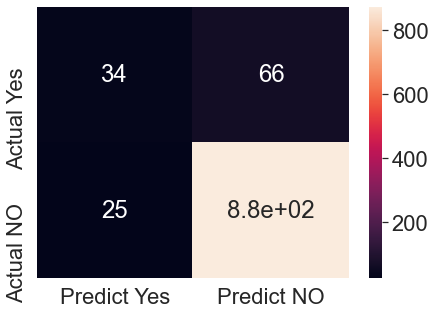

In [87]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual Yes","Actual NO"]],
                  columns = [i for i in ["Predict Yes","Predict NO"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Measure on True Positive and False Positive

In [88]:
# Confusion Matrix
print('\nLogistic Regression Confusion Matrix : \n', cm)
print('\nTrue Positive    = ', cm[0][0])
print('True Negative     = ',   cm[1][1])
print('False Positive     = ',   cm[1][0])
print('False Negative    = ',   cm[0][1])



Logistic Regression Confusion Matrix : 
 [[ 34  66]
 [ 25 875]]

True Positive    =  34
True Negative     =  875
False Positive     =  25
False Negative    =  66


## Metrics Score for Dataset with AGE

In [89]:
scores_LR = get_metrics_score1(model_fit,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.908
Accuracy on test set :  0.909
Recall on training set :  0.3157894736842105
Recall on test set :  0.34
Precision on training set :  0.5263157894736842
Precision on test set :  0.576271186440678
F1 on training set :  0.39473684210526316
F1 on test set :  0.4276729559748428


## Metrics Score for Dataset without AGE

In [90]:
scores_LR = get_metrics_score1(model1_fit,X1_train,X1_test,y1_train,y1_test)

Accuracy on training set :  0.90875
Accuracy on test set :  0.908
Recall on training set :  0.32105263157894737
Recall on test set :  0.34
Precision on training set :  0.5327510917030568
Precision on test set :  0.5666666666666667
F1 on training set :  0.4006568144499179
F1 on test set :  0.425


## Comparing two models with and without Age into consideration

Comparing both the model it shows that the F1 score seems to have improved on the training set and the F1 score has not changed noticebly in the test set

## Logistic Regression (with statsmodels library)

In [91]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg,X_train,X_test,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.124871
         Iterations 9
Accuracy on training set :  0.95175
Accuracy on test set :  0.947
Recall on training set :  0.6342105263157894
Recall on test set :  0.63
Precision on training set :  0.8169491525423729
Precision on test set :  0.7974683544303798
F1 on training set :  0.7140740740740742
F1 on test set :  0.7039106145251396


## Inference from above model


the scoremetrics with stats models library seems to have better Accuracy F1 nad recal value than the

<li>
LR withstatsmodellibrary Accuracy - 0.947 </li>
<li>
LR withsklearnlibrary accuracy -.90
</li>    

## Inference made from the Model

The accuracy  seems to be high but the recall value which gives the true value from all seems to be lower 
In this case we have taken the personal loan for predictionand it seems that our model has predicted that the actual percentage of people who will get the personal loan might be 70 % 

In [92]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3985
Method:                           MLE   Df Model:                           14
Date:                Fri, 04 Jun 2021   Pseudo R-squ.:                  0.6023
Time:                        16:26:59   Log-Likelihood:                -499.48
converged:                       True   LL-Null:                       -1255.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                          -0.0779      0.068     -1.148      0.251      -0.211       0.055
Experience                    0.0782      0.065      1.209      0.227      -0.049       0.205
Income                        0.0556      0.003     18.282      0.000       0.050       0.062
ZIPCode                      -0.0001   1.93e-05     -6.564      0.000      -0.000   -8.89e-05
Family                        0.6965      0.086      8.138      0.000       0.529       0.864
CCAvg                         0.1427      0.045      3.149      0.002       0.054       0.232
Education                     1.8505      0.134     13.844      0.000       1.588       2.112
Mortgage                      0.0008      0.001      1.250      0.211      -0.000       0.002
Securities_Account           -1.0122      0.335     -3.020      0.003      -1.669      -0.355
CD_Account                    3.7935      0.370     10.242      0.000       3.068       4.519
Online                       -0.6474      0.178     -3.640      0.000      -0.996      -0.299
CreditCard                   -1.1320      0.232     -4.887      0.000      -1.586      -0.678
Age_Range_ThirtyandFourty    -0.1345      0.365     -0.369      0.712      -0.850       0.581
Age_Range_Fifty               0.0825      0.611      0.135      0.893      -1.114       1.279
Age_Range_Sixty               0.0518      0.766      0.068      0.946      -1.449       1.552
=============================================================================================
"""

In [93]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train.astype(float).copy()

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Age                          1446.431829
Experience                    333.406566
Income                          6.624215
ZIPCode                       410.164459
Family                          5.583396
CCAvg                           3.866841
Education                       6.688006
Mortgage                        1.374177
Securities_Account              1.269351
CD_Account                      1.424169
Online                          2.559532
CreditCard                      1.572673
Age_Range_ThirtyandFourty      10.130801
Age_Range_Fifty                14.144649
Age_Range_Sixty                11.215354
dtype: float64



In [96]:
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

## ROC on training set

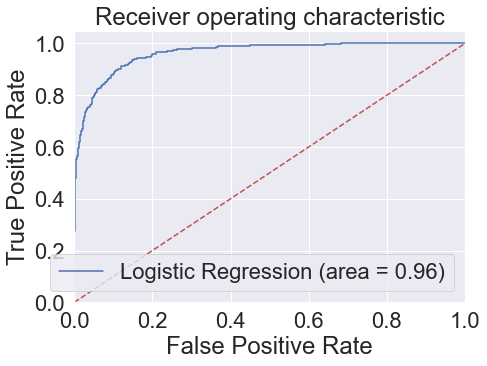

In [97]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

##  ROC under test set

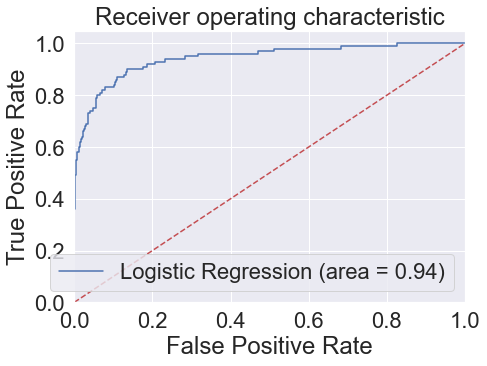

In [98]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## optimal_threshold_auc_roc

In [99]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict(X_test))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.06086668964112732


In [100]:
scores_LR = get_metrics_score1(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.8595
Accuracy on test set :  0.867
Recall on training set :  0.9315789473684211
Recall on test set :  0.89
Precision on training set :  0.39775280898876403
Precision on test set :  0.4218009478672986
F1 on training set :  0.5574803149606299
F1 on test set :  0.5723472668810289
ROC-AUC Score on training set :  0.8917563245129398
ROC-AUC Score on test set :  0.8772222222222223


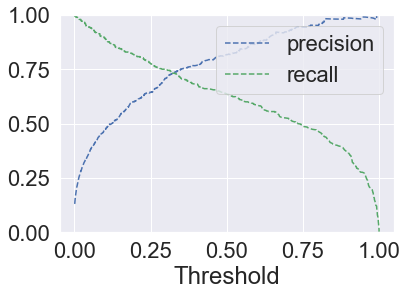

In [101]:
y_scores=lg.predict(X_train)
prec, rec, tre = precision_recall_curve(y_train, y_scores)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper right')
    plt.ylim([0,1])
plt.figure(figsize=(6,4))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.31, we get balanced recall and precision.

In [102]:

scores_LR = get_metrics_score1(lg,X_train,X_test,y_train,y_test,threshold=0.31,roc=True)

Accuracy on training set :  0.9485
Accuracy on test set :  0.939
Recall on training set :  0.7447368421052631
Recall on test set :  0.73
Precision on training set :  0.7219387755102041
Precision on test set :  0.6822429906542056
F1 on training set :  0.7331606217616582
F1 on test set :  0.7053140096618358
ROC-AUC Score on training set :  0.857313172433847
ROC-AUC Score on test set :  0.846111111111111


In [103]:
LR_comparison_frame = pd.DataFrame({'Model':['with statsmodels library',
'Metrics Score for Dataset with AGE',
'Metrics Score for Dataset without AGE',
'optimal_threshold_auc_roc as 0.06',
'optimal_threshold_from roc curve as 0.31'], 
'Train_Recall':[0.63,0.31,0.32,0.93,0.74], 
'Test_Recall':[0.63,0.34,0.34,0.89,0.73],
'Train_Accuracy':[0.95,0.91,0.91,0.87,0.95],
'Test_Accuracy':[0.95,0.91,0.91,0.86,0.94],
'Train_F1':[0.71,0.40,0.40,0.56,0.73],
'Test_F1':[0.70,0.43,0.43,0.57,0.71]}) 
LR_comparison_frame

,Model,Train_Recall,Test_Recall,Train_Accuracy,Test_Accuracy,Train_F1,Test_F1
0,with statsmodels library,0.63,0.63,0.95,0.95,0.71,0.70
1,Metrics Score for Dataset with AGE,0.31,0.34,0.91,0.91,0.40,0.43
2,Metrics Score for Dataset without AGE,0.32,0.34,0.91,0.91,0.40,0.43
3,optimal_threshold_auc_roc as 0.06,0.93,0.89,0.87,0.86,0.56,0.57
4,optimal_threshold_from roc curve as 0.31,0.74,0.73,0.95,0.94,0.73,0.71


Considering F1 Score Optimal threshold 0.31 seems to give the best value of 0.71

# Decision Tree Model

In [104]:
X = data.drop(['Personal_Loan'], axis=1)
y = data['Personal_Loan']

In [105]:
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

def evaluation(dtree,x,y):
    y_predict_probe=dtree.predit_probe(x)[:,1]
    precision,recall,threshholds=roc_curve(y,y_predict_proba)
    fpr,tpr,thresholds=roc_curve(y,y_predict_proba)
    return{
           'ROC AUC':auc(fpr,tpr),
           'PR AUC':auc(recall,precision)
           
       }

evaluation(dtree,X_train,y_train)

In [ ]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

In [ ]:
y.sum(axis = 0)

In [ ]:
X_test.sum(axis=0)

## Function to create a Confusion Matrix

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Function to Call Recall score

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [ ]:
##  Function to calculate recall score
def get_F1_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
    print("Recall on test set : ",metrics.f1__score(y_test,pred_test))




## Confusion Matrix for decision tree

In [ ]:
make_confusion_matrix(dTree,y_test)

In [ ]:
# Recall on train and test
get_recall_score(dTree)

## Reducing overfitting by choosing depth to be 7

In [ ]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=7,random_state=1)
dTree1.fit(X_train, y_train)

In [ ]:
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))

In [ ]:
# Recall on train and test
get_recall_score(dTree1)

In [ ]:
dTree2 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree2.fit(X_train, y_train)

In [ ]:
# Recall on train and test
get_recall_score(dTree2)

## Confusion Matrix after reducing the depth to 7

In [ ]:
make_confusion_matrix(dTree1,y_test)

In [ ]:
feature_names = list(X.columns)
print(feature_names)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Visualizing the Decision Tree- intial model

In [ ]:
plt.figure(figsize=(20,30))
out=tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Visualizing the Decision Tree-with max depth as 7

In [ ]:
plt.figure(figsize=(20,30))
out=tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 ## Using GridSearch for Hyperparameter tuning of our tree model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1],
              'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

## Confusion Matrix - decision tree with tuned hyperparameters

In [ ]:
make_confusion_matrix(estimator,y_test)

In [ ]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

In [ ]:
plt.figure(figsize=(15,10))

out=tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Accuracy Verses alpha in test ad training test

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

## Confusion Matrix best model

In [ ]:

make_confusion_matrix(best_model,y_test)

In [ ]:
# Recall on train and test
get_recall_score(best_model)

In [ ]:
plt.figure(figsize=(17,15))

out=tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

In [ ]:

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Compare all decisiontree models

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth 7','Decision treee with hyperparameter tuning',
                                         ], 'Train_Recall':[1,0.96,0.91], 'Test_Recall':[0.91,0.88,0.86]}) 
comparison_frame

**Decision tree with max depth as 7 is giving the highest recall on test set.**